In [30]:
from pandas_summary import DataFrameSummary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [31]:
data = pd.read_csv('../Data/Raw/data.csv', sep='\t')
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [64]:
data.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


In [6]:
# VEO QUE TENGO VALORES NAN Y NONE
print (data['country'].unique())
print (data['country'].nunique())

['IN' 'US' 'PL' 'MY' 'MX' 'GB' 'DE' 'EE' 'CA' 'EC' 'AU' 'FI' 'ID' 'AE'
 'NONE' 'ES' 'NI' 'DO' 'TR' 'NO' 'GR' 'LK' 'BR' 'AR' 'KH' 'IT' 'MK' 'PT'
 'BA' 'RU' 'HU' 'KR' 'IE' 'RS' 'CZ' 'PH' 'RO' 'FR' 'SG' 'AT' 'UA' 'KW'
 'CO' 'GE' 'SE' 'HK' 'NZ' 'ZA' 'NL' 'DK' 'JM' 'LB' 'CL' 'AW' 'IL' 'GT'
 'PE' 'PK' 'NP' 'HR' 'CR' 'VE' 'BG' 'GH' 'MA' 'PR' 'SI' 'LV' 'AL' 'VN'
 'GU' 'BD' 'TH' 'NG' 'FO' 'UY' 'EG' 'BE' 'SA' 'SV' 'CH' 'PY' 'SK' 'SY'
 'TN' 'TT' 'SR' 'KE' 'BY' 'PA' 'CY' 'BW' 'MZ' 'BB' 'GG' 'CW' 'IS' 'IR'
 'BN' 'MV' 'OM' 'DZ' 'JP' 'MU' nan 'IQ' 'BO' 'MD' 'CN' 'LT' 'BZ' 'BH' 'ME'
 'QA' 'TW' 'PS' 'JO' 'SD' 'KY' 'AZ' 'AO' 'BS' 'GY' 'MO' 'TZ' 'IM' 'AF'
 'AM' 'UZ' 'LU' 'ET' 'JE' 'VU' 'TJ' 'KZ' 'XK' 'HN' 'ZW' 'LA' 'MT' 'SN'
 'MN' 'TG' 'SC' 'RE' 'VC']
145


In [16]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 2. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['voted'].unique())
print (data['voted'].nunique())

[2 1 0]
3


In [60]:
data[(data['voted']==0)].shape


(327, 172)

In [17]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['married'].unique())
print (data['married'].nunique())

[1 3 2 0]
4


In [109]:
data[(data['married']==3)].shape

(1092, 172)

In [18]:
print (data['familysize'].unique())
print (data['familysize'].nunique())

[  2   4   3   5   1   6   8  12   7   0  11   9  13  10  62  16  14  99
  17  54  65  15  26  24  19  21  23 133]
28


In [43]:
# ANTES DE TOMAR UNA DECICISON SOBRE QUÉ HACER CON EL NÚMERO DE HIJOS ELEVADO, VAMOS A VER FILTRAR POR NUMERO DE HIJOS MAYOR A 10, PARA VER SU TAMAÑO

familysize_mayor10 = data[(data['familysize']>10)]

In [44]:
familysize_mayor10.shape

(216, 172)

In [45]:
# HACEMOS LO MISMO PARA NUMERO DE HIJOS MAYOR A 15
familysize_mayor15 = data[(data['familysize']>15)]
familysize_mayor15.shape

(18, 172)

In [21]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 4. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['education'].unique())
print (data['education'].nunique())

[2 1 3 4 0]
5


In [42]:
data[(data['education']==0)].shape


(515, 172)

In [22]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['urban'].unique())
print (data['urban'].nunique())

[3 2 1 0]
4


In [43]:
data[(data['urban']==0)].shape

(382, 172)

In [23]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['gender'].unique())
print (data['gender'].nunique())

[2 1 3 0]
4


In [114]:
data[(data['gender']==0)].shape

(67, 172)

In [24]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 2. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['engnat'].unique())
print (data['engnat'].nunique())

[2 1 0]
3


In [45]:
data[(data['engnat']==0)].shape

(52, 172)

In [25]:
# VEO QUE HAY EDADES QUE NO TIENEN SENTIDO. TENGO QUE VER QUE HACER CON ELLAS
print (data['age'].unique())
print (data['age'].nunique())

[  16   17   13   19   20   29   18   15   31   34   22   42   21   23
   26   43   35   25   24   61   40   27   28   60   14   37   46   57
   41   55   36   30   32   56   71   67   44   38   49   45   47   33
   54   53   50   48   58   68   39   51   62   59   52   77   85   63
   69   65   75   72   70   73   64   66   79   80   78  223 1996   89
  117   82   74 1998   76  115 1993 1991   99]
79


In [26]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 3. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['hand'].unique())
print (data['hand'].nunique())

[1 2 3 0]
4


In [46]:
data[(data['hand']==0)].shape

(173, 172)

In [27]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 12. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['religion'].unique())
print (data['religion'].nunique())

[12  7  4 10  2  6  1  8  3  0  5 11  9]
13


In [47]:
data[(data['religion']==0)].shape

(356, 172)

In [28]:
# LOS VALORES TENDRIAN QUE IR DE 1 A 5. HAY QUE VER LA COMPOSICION DE LOS DATOS
print (data['orientation'].unique())
print (data['orientation'].nunique())

[1 0 3 5 2 4]
6


In [48]:
data[(data['orientation']==0)].shape

(3109, 172)

In [51]:
# LOS VALORES 0 SUPONEN CASI UN 8% DEL TOTAL 
(len(data[data['orientation']== 0])/data.shape[0])*100

7.816467630421118

In [78]:
print (data['race'].unique())
print (data['race'].nunique())

[10 70 60 50 30 40 20]
7


In [81]:

print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['voted']==0)].shape[0], ' de valor 0 para voted cuando voted tiene :', data[(data['voted']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['married']==0)].shape[0], ' de valor 0 para married cuando married tiene :', data[(data['married']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['education']==0)].shape[0], ' de valor 0 para education cuando education tiene :', data[(data['education']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['urban']==0)].shape[0], ' de valor 0 para urban cuando urban tiene :', data[(data['urban']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['gender']==0)].shape[0], ' de valor 0 para gender cuando gender tiene :', data[(data['gender']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['hand']==0)].shape[0], ' de valor 0 para hand cuando hand tiene :', data[(data['hand']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['religion']==0)].shape[0], ' de valor 0 para religion cuando religion tiene :', data[(data['religion']==0)].shape[0])
print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['country']=='NONE')].shape[0], ' de valor 0 para country cuando country tiene :', data[(data['country']=='NONE')].shape[0])

print ('Dentro de los valores 0 de orientacion hay :',orientacion[(orientacion['familysize']>10)].shape[0], ' de valor 0 para familysize cuando familysize tiene :', data[(data['familysize']>10)].shape[0])



Dentro de los valores 0 de orientacion hay : 108  de valor 0 para voted cuando voted tiene : 327
Dentro de los valores 0 de orientacion hay : 75  de valor 0 para married cuando married tiene : 195
Dentro de los valores 0 de orientacion hay : 58  de valor 0 para education cuando education tiene : 515
Dentro de los valores 0 de orientacion hay : 109  de valor 0 para urban cuando urban tiene : 382
Dentro de los valores 0 de orientacion hay : 5  de valor 0 para gender cuando gender tiene : 67
Dentro de los valores 0 de orientacion hay : 23  de valor 0 para hand cuando hand tiene : 173
Dentro de los valores 0 de orientacion hay : 87  de valor 0 para religion cuando religion tiene : 356
Dentro de los valores 0 de orientacion hay : 38  de valor 0 para country cuando country tiene : 539
Dentro de los valores 0 de orientacion hay : 19  de valor 0 para familysize cuando familysize tiene : 216


In [32]:
# # VAMOS A ELIMINAR LAS COLUMNAS QUE INICIALMENTE NO NECESITAMOS
from sys import path
sys.path.append('C:\\Users\\Laura\\Desktop\\Nueva carpeta\\Code\\util')

from funciones import drop_columns, cambio_respuestas, insert_column, ponderacion,categorizacion_anxiety,categorizacion_stress,categorizacion_depression,categorizacion_edad,categorizacion_familia,graficos_analisis
from variables import lista_patron, lista_new_columns, dicc_categorias, dicc_respuestas,lista_orden_colum, dicc_orientacion,dicc_genero,dicc_religion,dicc_raza,dicc_estado,dicc_lugar, colores,color_target



In [33]:
# HACEMOS COPIA DEL DATAFRAME

data_transf = data.copy()
data_transf

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [34]:
# VAMOS A ELIMINAR TODAS LAS COLUMNAS QUE INICIALEMNTE NO NECESITO
# INSERTO LAS COLUMNAS NECESARIAS
# VOY A PONDERAR LAS COLUMNAS CREADAS Y A DARLE EL VALOR CORRESPONDIENTE A LA COLUMNA TOTAL, ADEMAS DE DAR VALOR AL TARGET EN FUNCION DE ESTOS VALORES
data_transf= drop_columns(lista_patron, data_transf)
data_transf = cambio_respuestas(data_transf,dicc_respuestas)
data_transf = insert_column(lista_new_columns, data_transf)
data_transf = ponderacion(dicc_categorias, data_transf)

#data_transf["Target"] = data_transf["Total"].apply(val_target)
data_transf["Anxiety_cat"] = data_transf["Anxiety"].map(categorizacion_anxiety)
data_transf["Stress_cat"] = data_transf["Stress"].map(categorizacion_stress)
data_transf["Depression_cat"] = data_transf["Depression"].map(categorizacion_depression)

data_transf['gender'] = np.where(data_transf['gender']== 0,3,data_transf['gender'].values)
data_transf['religion'] = np.where(data_transf['religion']== 0,12,data_transf['religion'].values)
data_transf['orientation'] = np.where(data_transf['orientation']== 0,5,data_transf['orientation'].values)
data_transf['married'] = np.where(data_transf['married']== 0,3,data_transf['married'].values)


for x in range(data_transf.shape[0]):
    if data_transf.loc[x,'Depression_cat'] == 'Severe' or data_transf.loc[x,'Depression_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    elif data_transf.loc[x,'Anxiety_cat'] == 'Severe' or data_transf.loc[x,'Anxiety_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    elif data_transf.loc[x,'Stress_cat'] == 'Severe' or data_transf.loc[x,'Stress_cat'] == 'Extremely Severe':
        data_transf.loc[x,'Target'] = 1
    else:
        data_transf.loc[x,'Target'] = 0
        


data_transf['Target'] = data_transf['Target'].apply(round)
data_transf["urban_cat"] = data_transf["urban"].map(dicc_lugar)
data_transf["age_cat"] = data_transf["age"].map(categorizacion_edad)
data_transf["familysize_cat"] = data_transf["familysize"].map(categorizacion_familia)
data_transf["gender_cat"] = data_transf["gender"].map(dicc_genero)
data_transf["religion_cat"] = data_transf["religion"].map(dicc_religion)
data_transf["orientation_cat"] = data_transf["orientation"].map(dicc_orientacion)
data_transf["married_cat"] = data_transf["married"].map(dicc_estado)
data_transf["race_cat"] = data_transf["race"].map(dicc_raza)





data_transf= data_transf.reindex(columns=lista_orden_colum)



In [6]:
pd.options.display.max_columns = None
data_transf.head(11)

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,education,urban,urban_cat,age,age_cat,gender,gender_cat,religion,religion_cat,orientation,orientation_cat,married,married_cat,race,race_cat,familysize,familysize_cat,Depression,Depression_cat,Anxiety,Anxiety_cat,Stress,Stress_cat,Target
0,3,3,1,3,3,3,3,3,1,0,3,3,3,3,3,3,2,3,2,2,0,3,3,3,3,3,3,2,3,1,3,3,1,2,3,3,0,1,3,2,3,3,2,3,Urban (town-city),16,10-16,2,Female,12,Other,1,Heterosexual,1,Never married,10,Asian,2,<=2,27,Severe,34,Extremely Severe,40,Extremely Severe,1
1,3,0,1,2,3,3,2,3,2,1,1,1,3,3,2,2,3,1,0,0,1,2,0,1,1,2,2,3,2,2,1,2,2,1,1,2,3,1,1,0,1,1,2,3,Urban (town-city),16,10-16,2,Female,7,Other,5,Other,1,Never married,70,Other,4,3-5,24,Severe,17,Severe,27,Severe,1
2,2,0,3,0,3,2,0,2,1,3,1,0,3,0,3,3,3,1,1,0,3,2,1,3,1,0,1,0,1,1,3,2,0,3,2,3,3,3,1,1,0,3,2,3,Urban (town-city),17,17-21,2,Female,4,Catholic,3,Homosexual,1,Never married,60,White,3,3-5,39,Extremely Severe,12,Moderate,17,Mild,1
3,1,2,1,0,2,2,3,1,2,2,1,0,0,3,1,1,2,0,0,1,0,0,0,0,0,1,3,0,2,2,2,0,1,3,0,0,1,0,2,3,3,1,1,3,Urban (town-city),13,10-16,2,Female,4,Catholic,5,Other,1,Never married,70,Other,5,3-5,16,Moderate,17,Severe,16,Mild,1
4,1,1,2,3,3,1,3,3,3,2,1,3,3,3,3,2,3,3,3,3,2,2,3,1,3,3,1,3,1,3,2,3,3,3,2,3,2,2,2,3,3,2,3,2,Suburban,19,17-21,2,Female,10,Muslim,1,Heterosexual,1,Never married,10,Asian,4,3-5,32,Extremely Severe,40,Extremely Severe,29,Severe,1
5,0,0,1,0,2,0,0,2,2,1,0,1,0,2,1,3,1,0,0,1,0,0,0,1,0,0,0,0,2,1,1,0,3,0,2,1,1,1,0,0,0,1,2,3,Urban (town-city),20,17-21,2,Female,4,Catholic,1,Heterosexual,1,Never married,70,Other,4,3-5,13,Mild,6,Normal,12,Normal,0
6,0,0,1,2,3,0,2,2,2,3,0,1,1,1,2,3,1,1,0,2,3,0,2,2,1,1,0,1,1,2,3,1,3,2,1,1,3,3,3,1,1,2,2,3,Urban (town-city),17,17-21,2,Female,7,Other,2,Bisexual,1,Never married,60,White,4,3-5,31,Extremely Severe,19,Severe,14,Normal,1
7,0,0,0,0,2,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,4,2,Suburban,29,22-35,2,Female,2,Atheist,2,Bisexual,1,Never married,60,White,2,<=2,4,Normal,4,Normal,6,Normal,0
8,3,3,2,3,2,3,3,3,3,2,3,3,3,2,3,3,2,3,3,3,2,3,3,2,1,3,1,3,3,2,3,1,3,3,1,3,3,2,1,3,3,3,2,3,Urban (town-city),16,10-16,1,Male,12,Other,2,Bisexual,1,Never married,70,Other,4,3-5,35,Extremely Severe,39,Extremely Severe,33,Severe,1
9,2,1,3,0,3,3,2,3,3,3,3,3,3,3,1,3,3,0,3,3,3,2,0,3,2,3,3,3,3,2,3,1,3,3,2,3,3,3,3,3,2,3,1,1,Rural (country side),18,17-21,2,Female,2,Atheist,2,Bisexual,1,Never married,60,White,3,3-5,42,Extremely Severe,28,Extremely Severe,34,Extremely Severe,1


In [ ]:
# VAMOS A EMPEZAR CON EL ANALISIS DE LAS VARIABLES

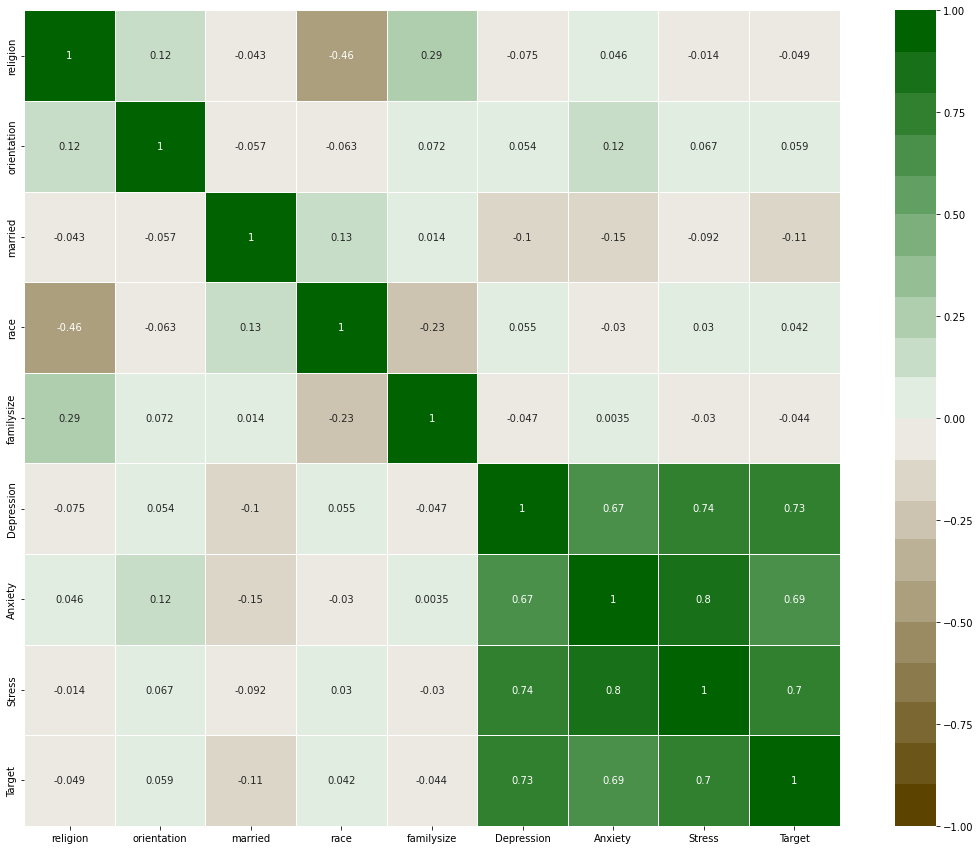

In [6]:
plt.figure(figsize=(20,15))
sns.heatmap(data_transf.iloc[ : ,-18: ].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(75, 500, s=500, l=28, n=20),
            square=True,
            annot=True,
            linewidths=.5);

In [46]:
data_transf['Target'].value_counts()

1    25481
0    14294
Name: Target, dtype: int64

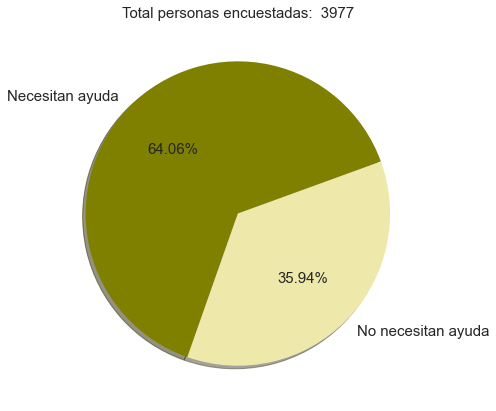

In [9]:
graf_target=plt.figure(figsize=(15,7))
plt.style.use('seaborn-whitegrid')

# plt.subplot(1,2,1)
info_color = ('#808000','#EEE8AA')

plt.pie(data_transf['Target'].value_counts() ,
        labels= ['Necesitan ayuda', 'No necesitan ayuda'],
        autopct='%1.2f%%',
        colors= info_color,
        shadow = True,
        startangle= 20,        
        textprops= {'fontsize':15})
plt.title('Total personas encuestadas:  3977',fontsize = 15 )
graf_target.savefig ('../util/Graficos/graf_target.png')




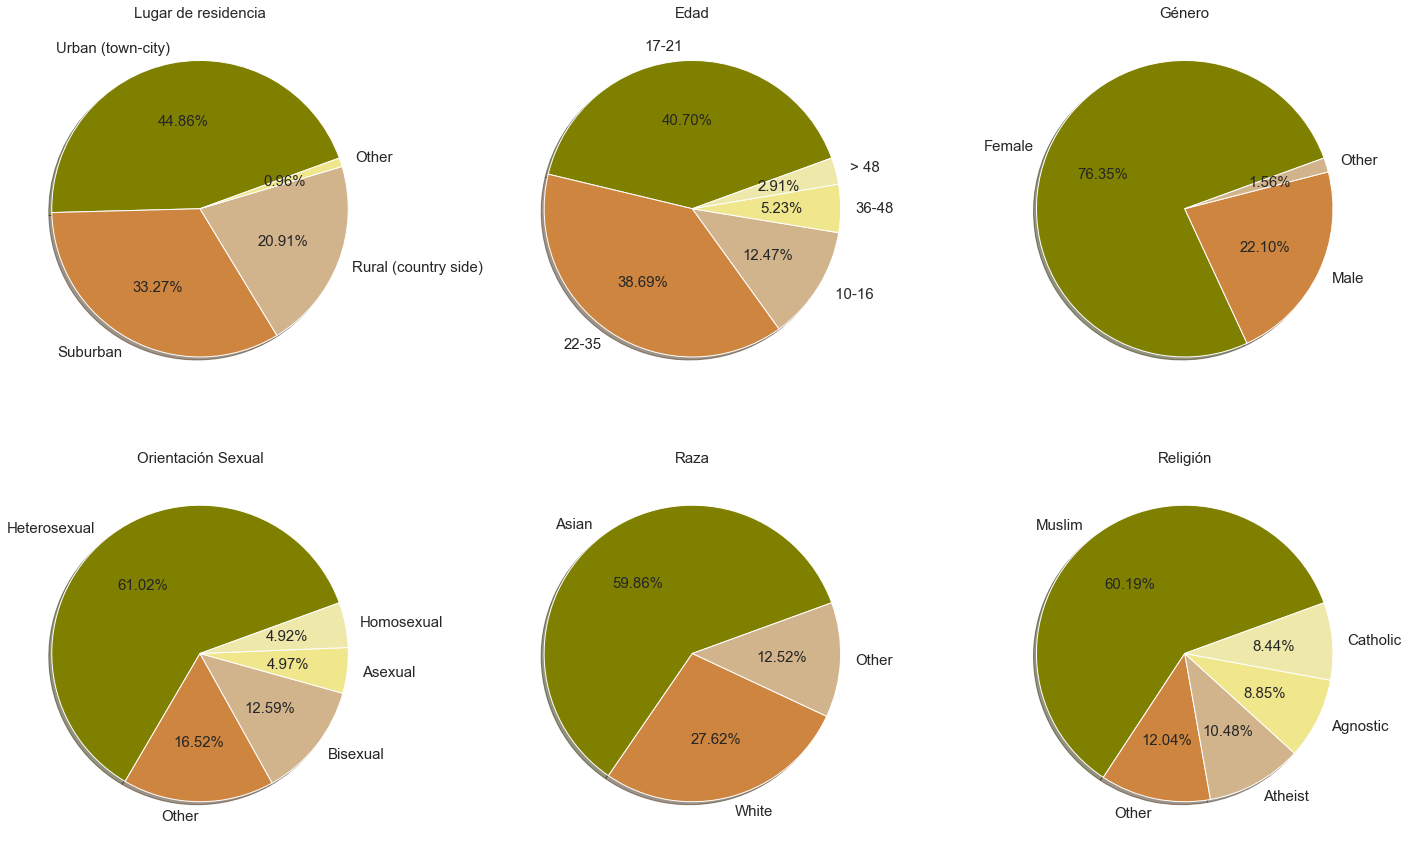

In [20]:
graf_resu_features=plt.figure(figsize=(25,15))
plt.style.use('seaborn-whitegrid')

plt.subplot(2,3,1)

info_color = list(reversed(colores))
plt.pie(data_transf['urban_cat'].value_counts() ,
        labels=data_transf['urban_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Lugar de residencia',fontsize = 15, loc='center' )

plt.subplot(2,3,2)
plt.pie(data_transf['age_cat'].value_counts() ,
        labels=data_transf['age_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Edad',fontsize = 15, loc='center' )

plt.subplot(2,3,3)

plt.pie(data_transf['gender_cat'].value_counts() ,
        labels=data_transf['gender_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15})
plt.title('Género',fontsize = 15, loc='center' )

plt.subplot(2,3,4)

plt.pie(data_transf['orientation_cat'].value_counts() ,
        labels=data_transf['orientation_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});
plt.title('Orientación Sexual',fontsize = 15, loc='center' )

plt.subplot(2,3,5)

plt.pie(data_transf[(data_transf['race_cat'] =='Asian') | (data_transf['race_cat'] =='Other') | (data_transf['race_cat'] =='White')]['race_cat'].value_counts() ,
        labels=data_transf[(data_transf['race_cat'] =='Asian') | (data_transf['race_cat'] =='Other') | (data_transf['race_cat'] =='White')]['race_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});
plt.title('Raza',fontsize = 15, loc='center' )

plt.subplot(2,3,6)

plt.pie(data_transf[(data_transf['religion_cat'] =='Muslim') | (data_transf['religion_cat'] =='Other') | (data_transf['religion_cat'] =='Atheist')| (data_transf['religion_cat'] =='Agnostic')| (data_transf['religion_cat'] =='Catholic')]['religion_cat'].value_counts() ,
        labels=data_transf[(data_transf['religion_cat'] =='Muslim') | (data_transf['religion_cat'] =='Other') | (data_transf['religion_cat'] =='Atheist')| (data_transf['religion_cat'] =='Agnostic')| (data_transf['religion_cat'] =='Catholic')]['religion_cat'].value_counts().index,
        autopct='%1.2f%%',
        colors= info_color, shadow = True, startangle= 20, textprops= {'fontsize':15});

plt.title('Religión',fontsize = 15, loc='center' )

graf_resu_features.savefig ('../util/Graficos/graf_resu_features.png')


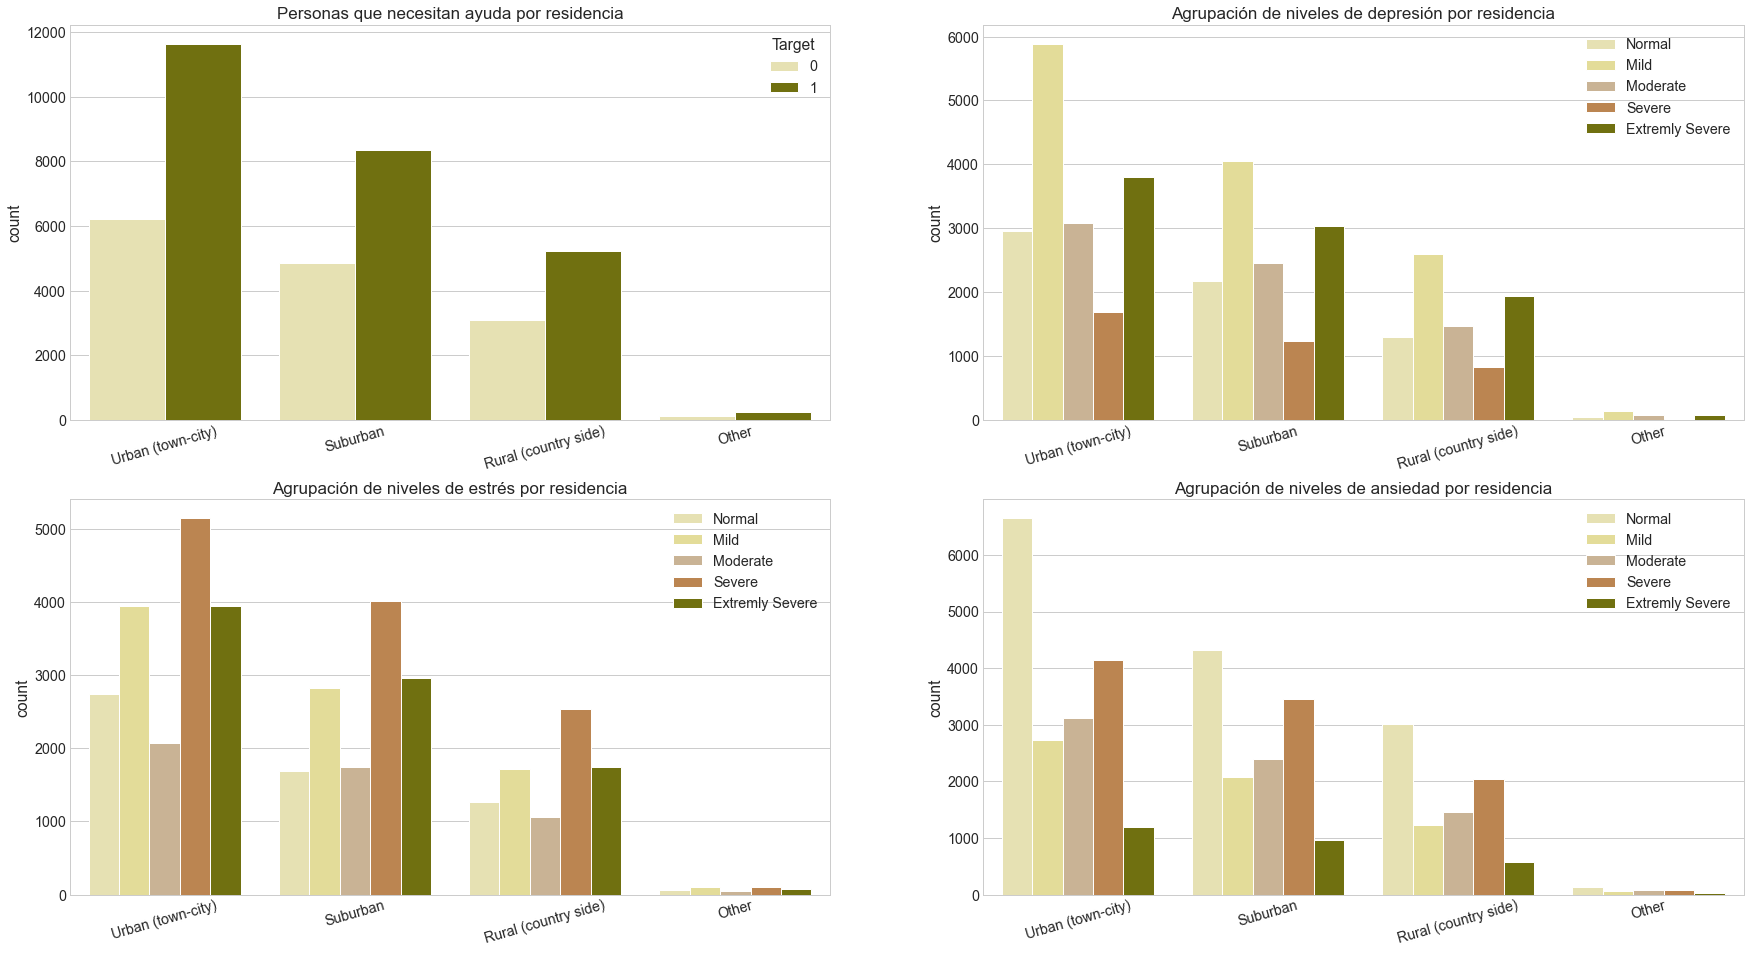

In [36]:

graf_urban_cat = plt.figure(figsize=(30,16))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'urban_cat','Target','Personas que necesitan ayuda por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'urban_cat','Depression_cat','Agrupación de niveles de depresión por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'urban_cat','Stress_cat','Agrupación de niveles de estrés por residencia',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'urban_cat','Anxiety_cat','Agrupación de niveles de ansiedad por residencia',color_target, colores);

graf_urban_cat.savefig ('../util/Graficos/graf_urban_cat.png')


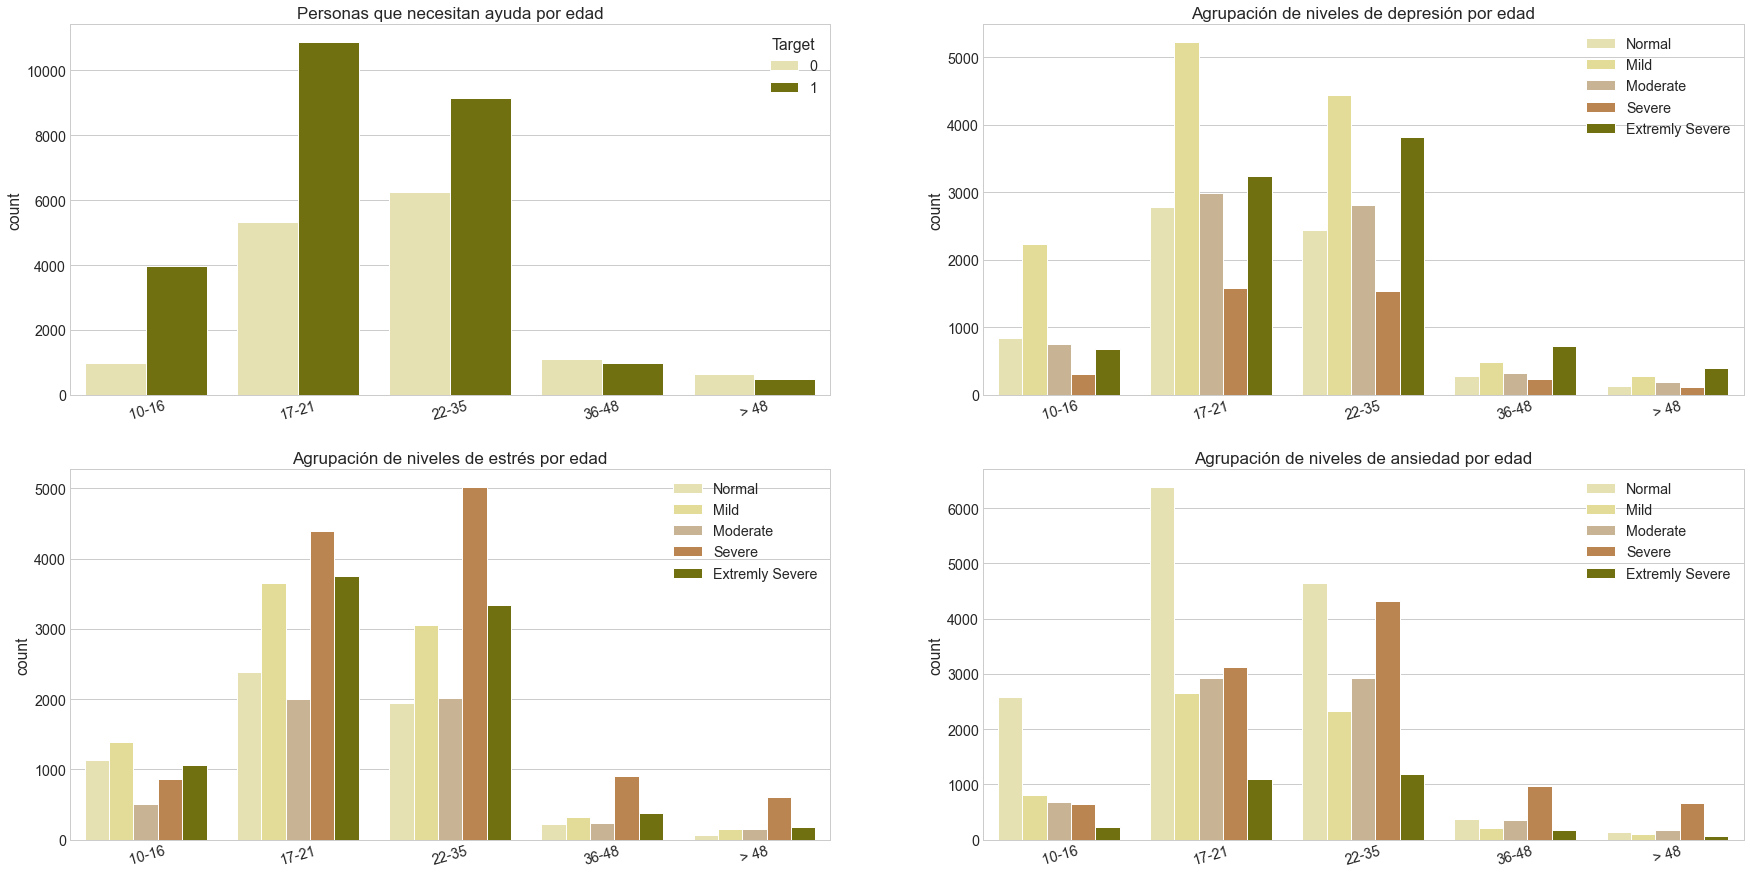

In [37]:


graf_age_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'age_cat','Target','Personas que necesitan ayuda por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'age_cat','Depression_cat','Agrupación de niveles de depresión por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'age_cat','Stress_cat','Agrupación de niveles de estrés por edad',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'age_cat','Anxiety_cat','Agrupación de niveles de ansiedad por edad',color_target,colores);


graf_age_cat.savefig ('../util/Graficos/graf_age_cat.png')

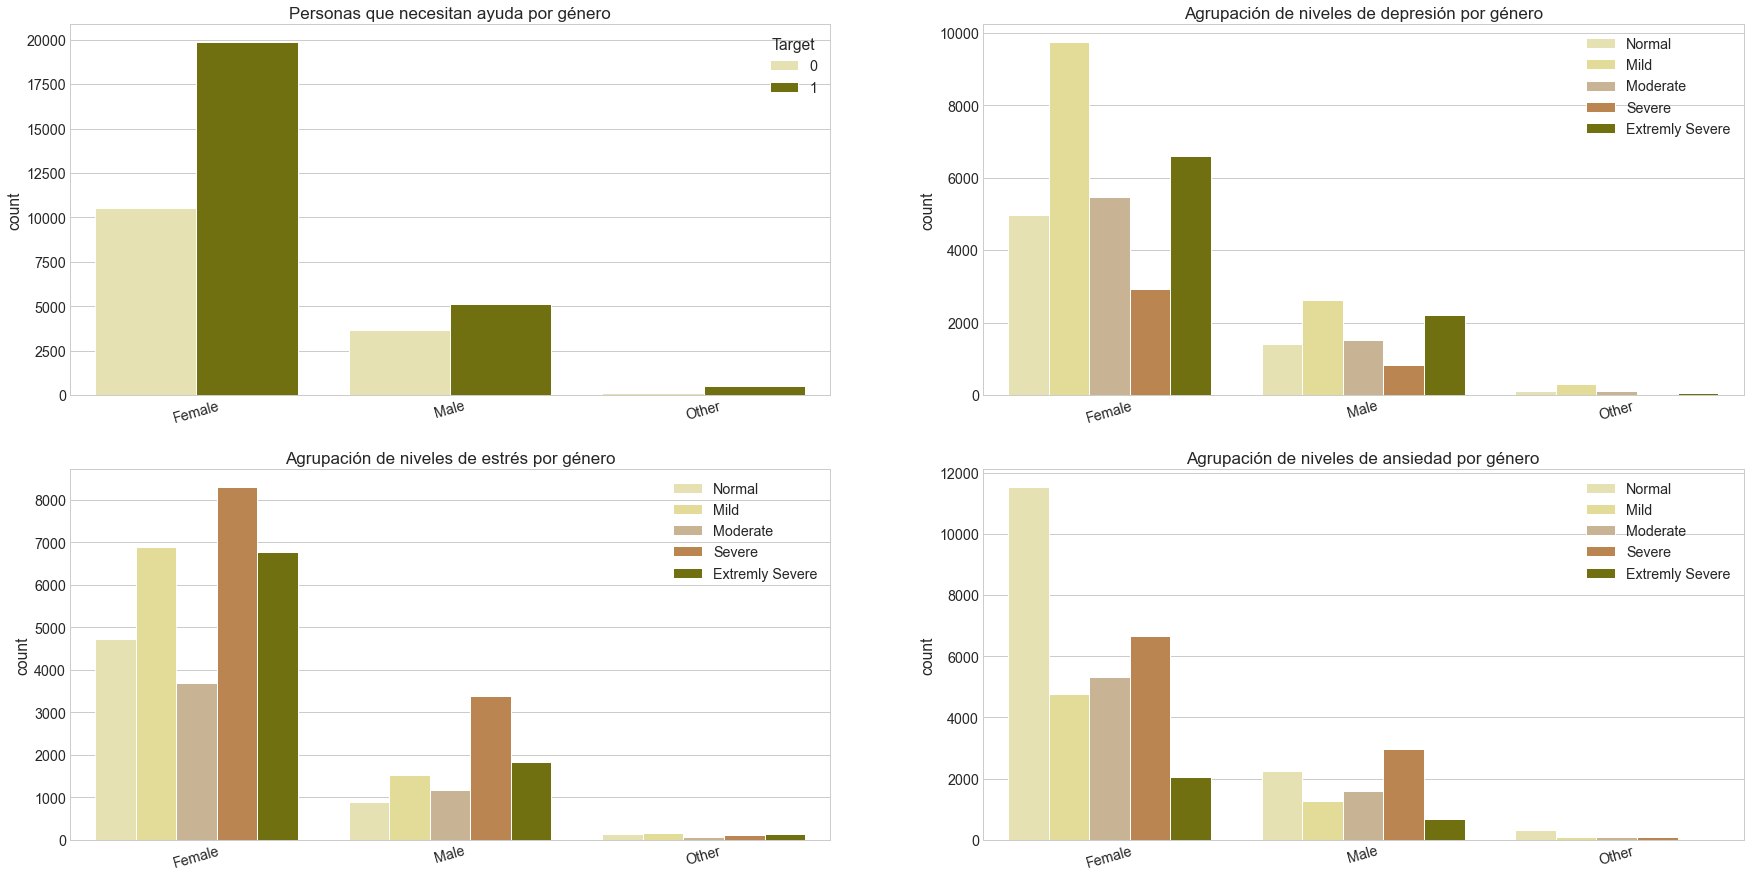

In [38]:


graf_gender_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'gender_cat','Target','Personas que necesitan ayuda por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'gender_cat','Depression_cat','Agrupación de niveles de depresión por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'gender_cat','Stress_cat','Agrupación de niveles de estrés por género',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'gender_cat','Anxiety_cat','Agrupación de niveles de ansiedad por género',color_target,colores);

graf_gender_cat.savefig ('../util/Graficos/graf_gender_cat.png')

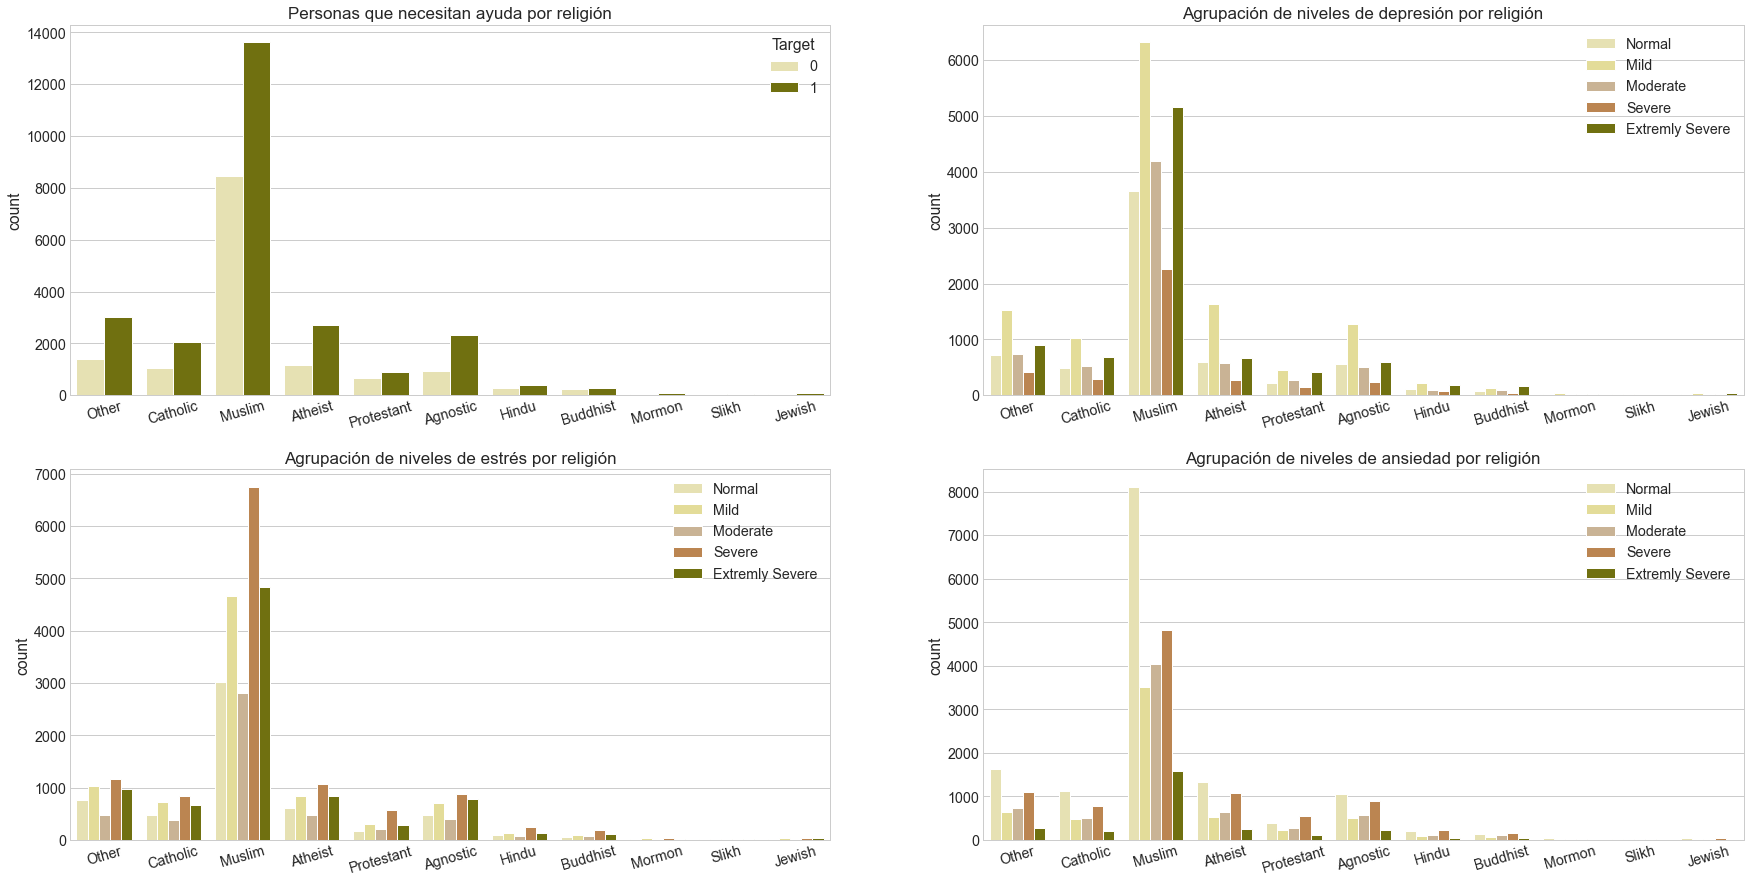

In [39]:
graf_religion_cat = plt.figure(figsize=(30,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'religion_cat','Target','Personas que necesitan ayuda por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'religion_cat','Depression_cat','Agrupación de niveles de depresión por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'religion_cat','Stress_cat','Agrupación de niveles de estrés por religión',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'religion_cat','Anxiety_cat','Agrupación de niveles de ansiedad por religión',color_target,colores);


graf_religion_cat.savefig ('../util/Graficos/graf_religion_cat.png')

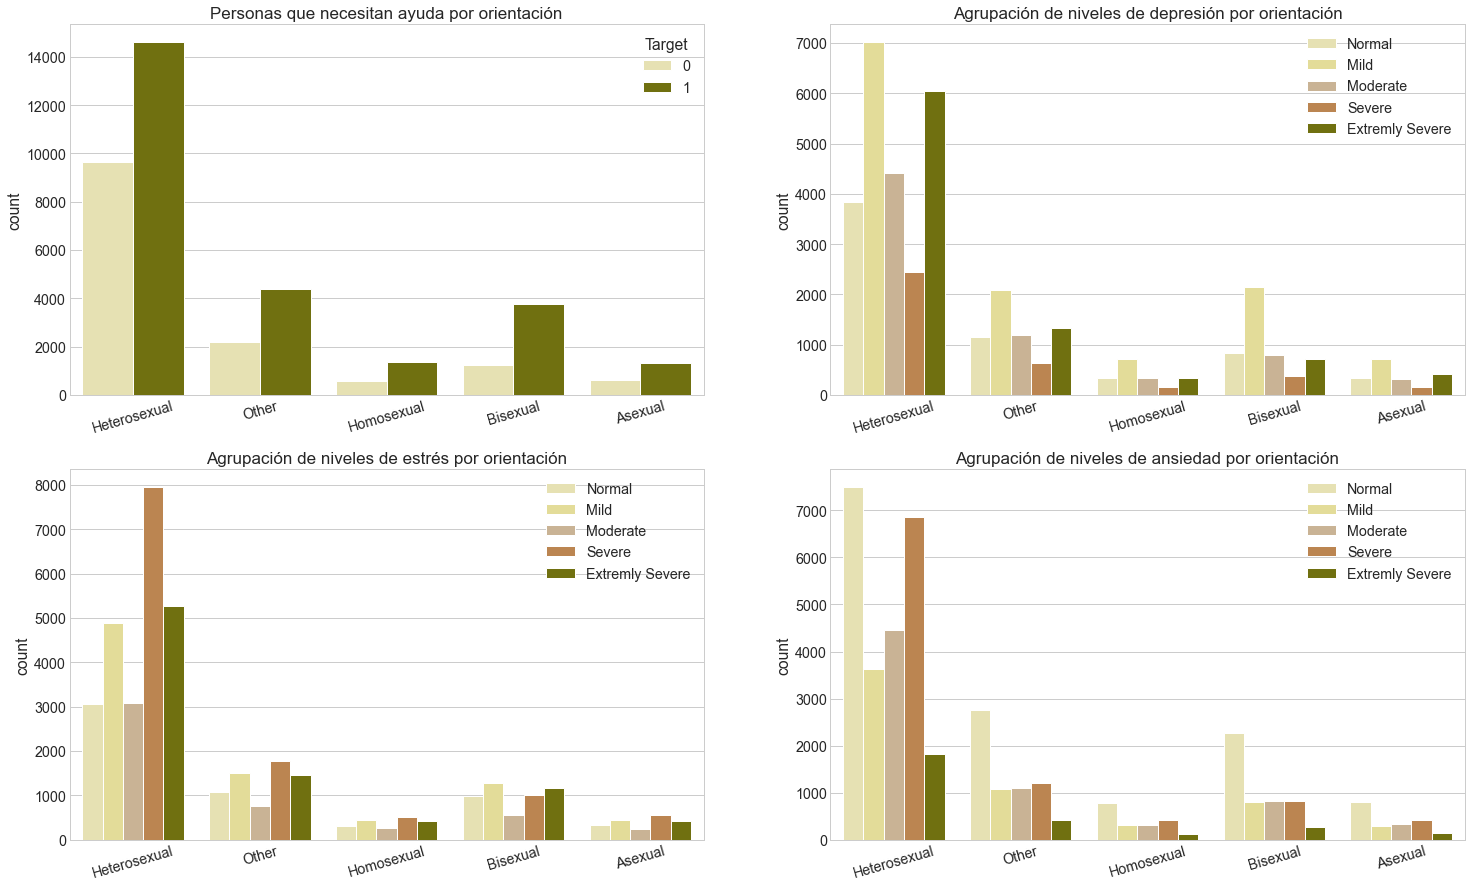

In [40]:
graf_orientation_cat =plt.figure(figsize=(25,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'orientation_cat','Target','Personas que necesitan ayuda por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'orientation_cat','Depression_cat','Agrupación de niveles de depresión por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'orientation_cat','Stress_cat','Agrupación de niveles de estrés por orientación',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'orientation_cat','Anxiety_cat','Agrupación de niveles de ansiedad por orientación',color_target,colores);



graf_orientation_cat.savefig ('../util/Graficos/graf_orientation_cat.png')

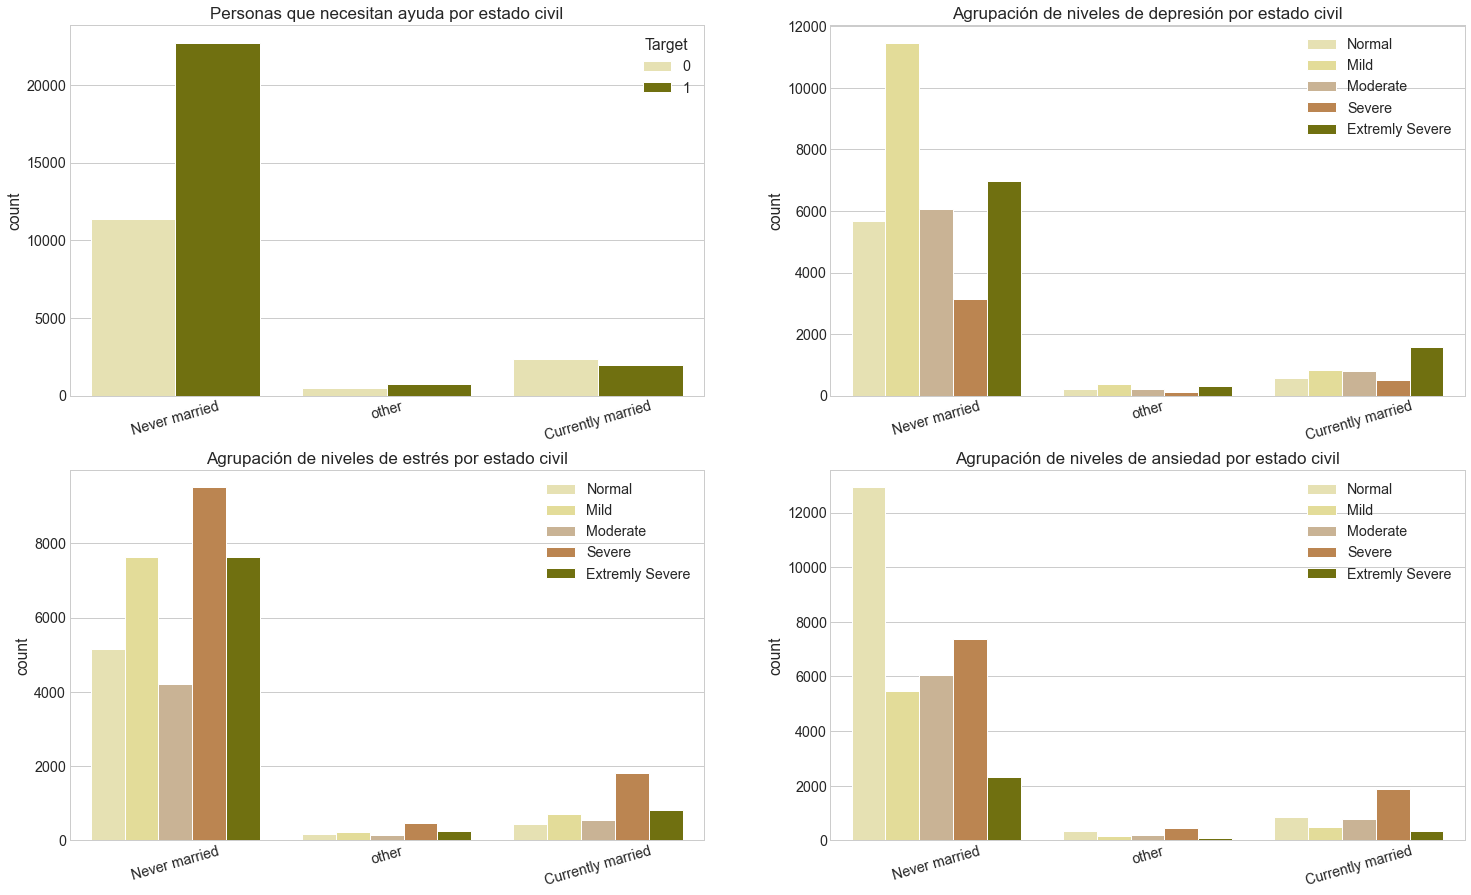

In [41]:
graf_married_cat = plt.figure(figsize=(25,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'married_cat','Target','Personas que necesitan ayuda por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'married_cat','Depression_cat','Agrupación de niveles de depresión por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'married_cat','Stress_cat','Agrupación de niveles de estrés por estado civil',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'married_cat','Anxiety_cat','Agrupación de niveles de ansiedad por estado civil',color_target,colores);


graf_married_cat.savefig ('../util/Graficos/graf_married_cat.png')

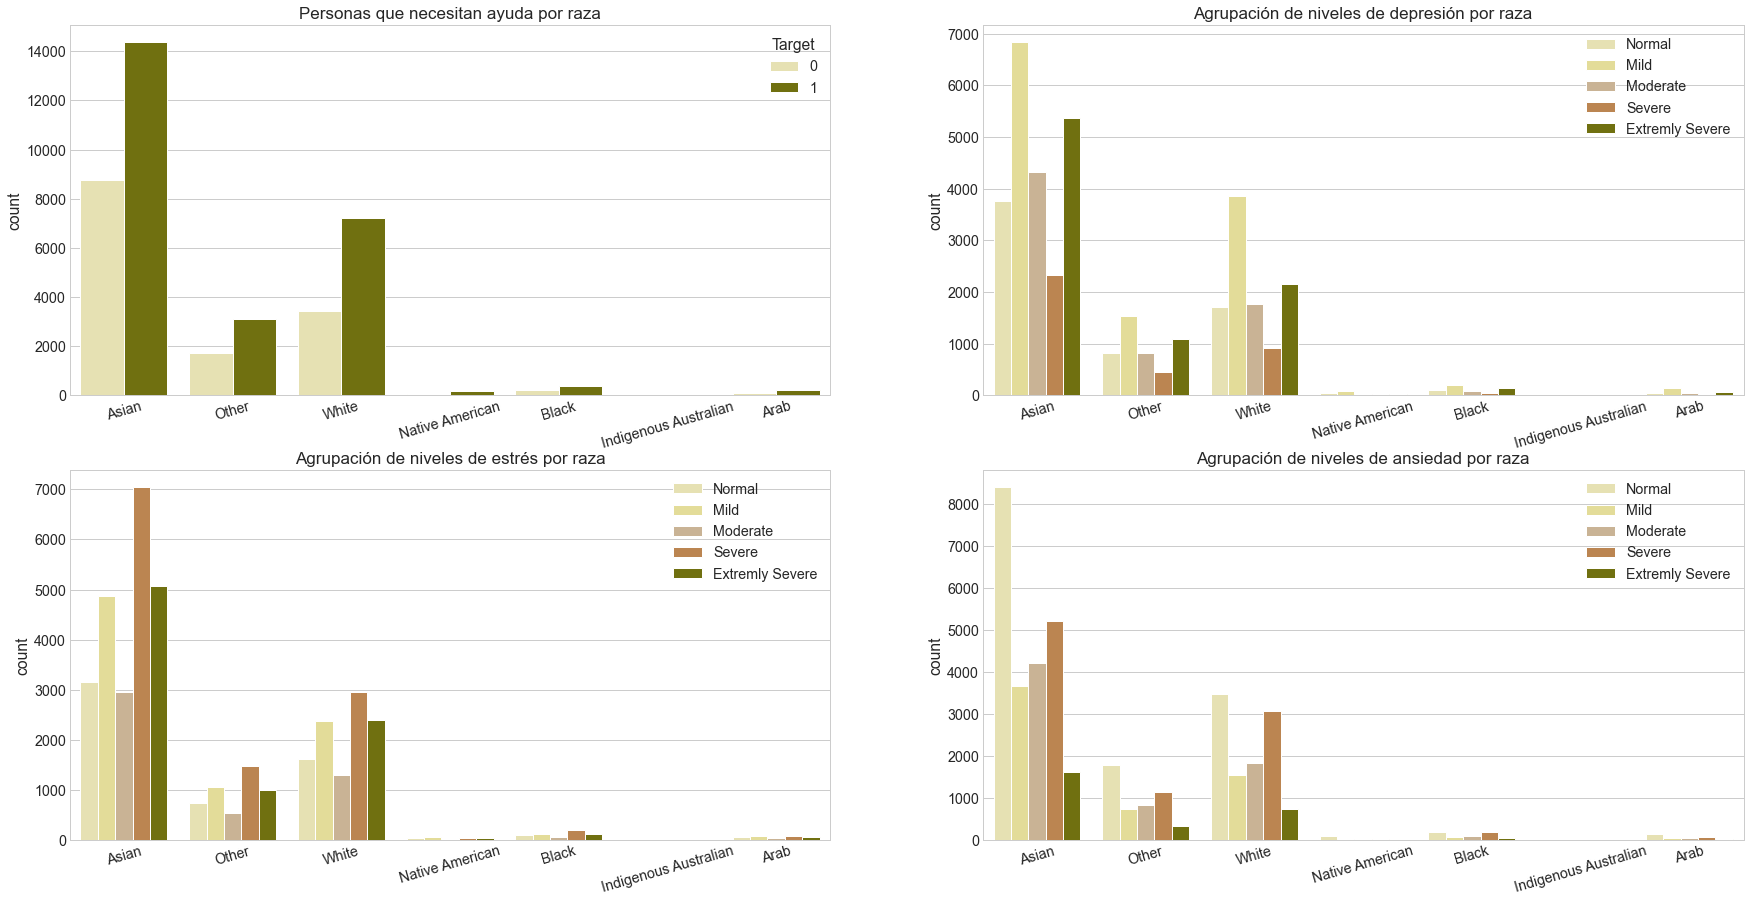

In [42]:
graf_race_cat = plt.figure(figsize=(30,15))


plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'race_cat','Target','Personas que necesitan ayuda por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'race_cat','Depression_cat','Agrupación de niveles de depresión por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'race_cat','Stress_cat','Agrupación de niveles de estrés por raza',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'race_cat','Anxiety_cat','Agrupación de niveles de ansiedad por raza',color_target,colores);


graf_race_cat.savefig ('../util/Graficos/graf_race_cat.png')

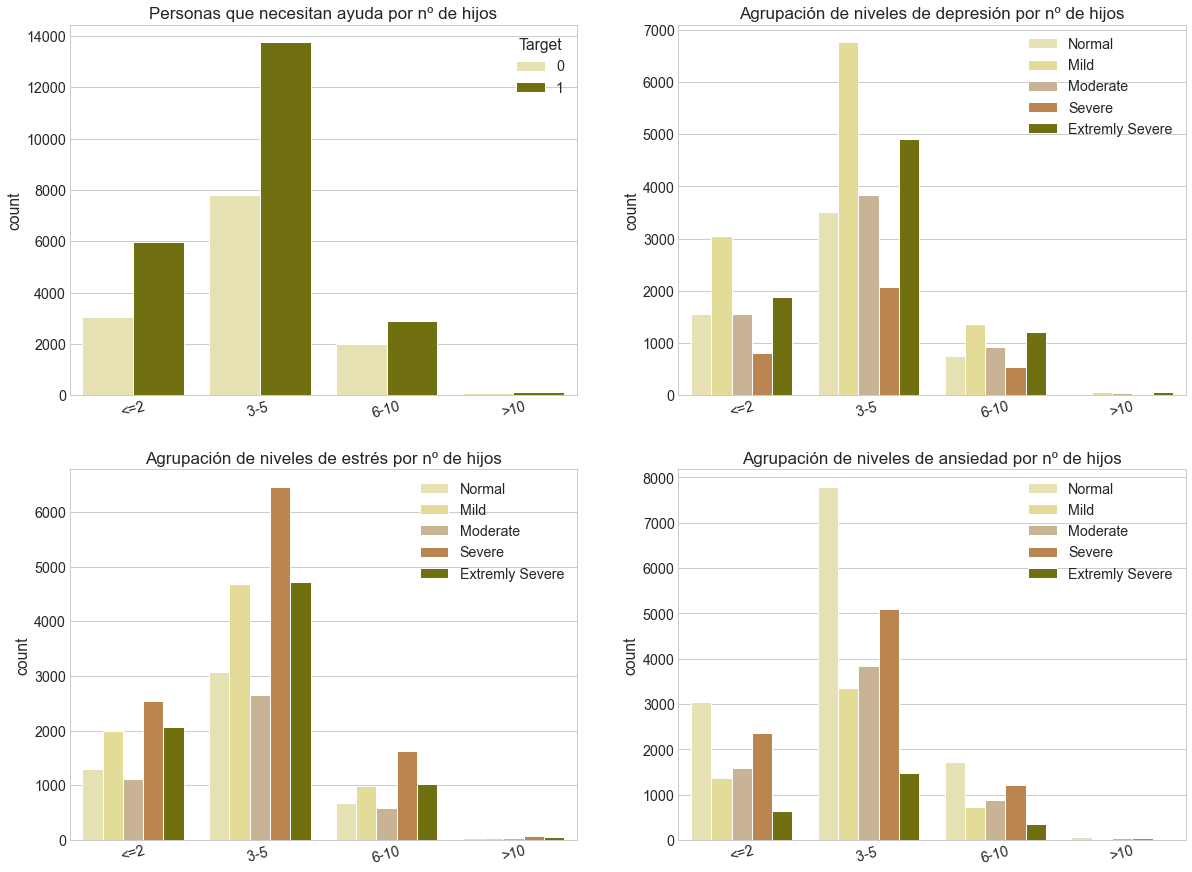

In [43]:
graf_familysize_cat = plt.figure(figsize=(20,15))

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,1)
graficos_analisis(data_transf,'familysize_cat','Target','Personas que necesitan ayuda por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,2)
graficos_analisis(data_transf,'familysize_cat','Depression_cat','Agrupación de niveles de depresión por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,3)
graficos_analisis(data_transf,'familysize_cat','Stress_cat','Agrupación de niveles de estrés por nº de hijos',color_target,colores)

plt.style.use('seaborn-whitegrid')
plt.subplot(2,2,4)
graficos_analisis(data_transf,'familysize_cat','Anxiety_cat','Agrupación de niveles de ansiedad por nº de hijos',color_target,colores);

graf_familysize_cat.savefig ('../util/Graficos/graf_familysize_cat.png')

In [22]:
# GUARDO EL CSV PROCESADO
data_transf[['urban','age','gender','religion','orientation','married','race','familysize','Depression','Anxiety','Stress','Target']].to_csv('../Data/Processed/data_processed.csv')
